In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
TAXA_DEF = False
TAXA = 90
TEMPO = 600
REQ = int(22.22222 * TEMPO) + 1 if TAXA_DEF else int(TAXA * TEMPO) + 1
REQ

54001

In [29]:
def gerar_intervalos_requisicoes(num_requisicoes, tempo_total, natureza):
    natureza_normalizada = [n / 10.0 for n in natureza]
    full = []
    for p in natureza_normalizada:
        padrao_completo = ([p] * (num_requisicoes // len(natureza_normalizada) + 1))[:num_requisicoes]
        full.extend(padrao_completo)
    padrao_completo = full
    taxa_media = num_requisicoes / tempo_total
    intervalos_base = np.random.exponential(1/taxa_media, num_requisicoes)
    
    intervalos_ajustados = []
    for i, intervalo in enumerate(intervalos_base):
        fator_ajuste = 1.0 / padrao_completo[i] if padrao_completo[i] > 0 else 1.0
        intervalo_ajustado = intervalo * fator_ajuste
        intervalos_ajustados.append(intervalo_ajustado)
    
    soma_intervalos = sum(intervalos_ajustados)
    fator_normalizacao = tempo_total / soma_intervalos
    intervalos_finais = [intervalo * fator_normalizacao for intervalo in intervalos_ajustados]
    
    intervalos_finais = [max(intervalo, 0.001) for intervalo in intervalos_finais]
    
    soma_final = sum(intervalos_finais)
    if soma_final > 0:
        intervalos_finais = [intervalo * tempo_total / soma_final for intervalo in intervalos_finais]
    
    return intervalos_finais

In [31]:
intervalos = gerar_intervalos_requisicoes(REQ, TEMPO, [1,1,2,3,4,9,10,9,9,8,10,2,3,2,1,1,3,4,1,1])

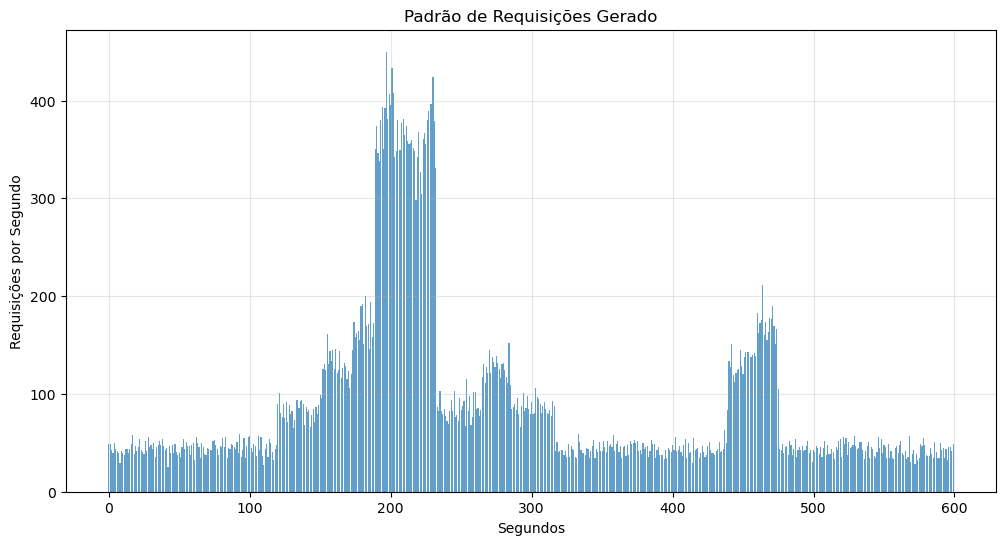

In [33]:
tempos_acumulados = np.cumsum(intervalos)
requisicoes_por_segundo = [0] * int(TEMPO)

for tempo in tempos_acumulados:
    segundo = int(tempo)
    if segundo < TEMPO:
        requisicoes_por_segundo[segundo] += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(len(requisicoes_por_segundo)), requisicoes_por_segundo, alpha=0.7)
plt.xlabel('Segundos')
plt.ylabel('Requisições por Segundo')
plt.title('Padrão de Requisições Gerado')
plt.grid(True, alpha=0.3)
plt.show()



In [35]:
sum(intervalos)

600.0000000000509

In [37]:
with open('scenario.delta', 'w') as arquivo:
    for intervalo in intervalos:
        arquivo.write(f"{intervalo}\n")